# Formatting MatPlotLib Plots
***
MatPlotLib has a very powerful set of plot customizations available: you can make the plots look like anything you want. However, using them can be pretty confusing, so it's always better to settle for an average plot than spend a week customizing it! 

We will discuss some pretty simple formatting techniques; I also suggest looking at [MatPlotLib examples](https://matplotlib.org/gallery/index.html) page. If you find a plot you like, you can just copy the source code from there!

This guide has the following sections:
1. [The basics: `fmt` string](#fmt) (color, line style, markers)
2. [Choosing colors](#colors) in different ways
3. [Font size](#fontsize)
4. [Figure size](#figsize)
5. *Advanced*: [line width, opacity, setting different colors for lines & markers](#other-stuff)
6. *Even more advanced*: [subplots](#subplots)

And as always, before we begin, import MatPlotLib and make some data.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generating our sample data set
import numpy as np
xs = np.linspace(-np.pi, np.pi, 30)   # Generate 100 x values from -pi to pi
ys = np.sin(xs)                        # Calculate sin(x)

## <span id="fmt">Format string: `fmt`</span>
***

`fmt` function sets the appearance of your plot, using 3 arguments passed as one string. It decides 3 things (in this order): 

1. The line/marker color (**r** = **r**ed, **b**=**b**lue... the weird one is **k** = blac**k**, none = default MatPlotLib colorscheme)
2. The marker style (**o** = circles, **.** = points, none = no marker) [See more marker styles](https://matplotlib.org/api/markers_api.html)
3. The line style the line style (**--** = dashed, **-** = solid, none = no line)

As long as you keep the order right, you can just combine these in one string. For example, `fmt="bo--"` plots a blue dashed line connecting circular points and `fmt="o"` plots just the points, without a line connecting them, in default MatPlotLib colors. **Default format is `"-"`: solid line, no marker, default color**

* In `errorbar()` plots, format string is given after the x and y data with `fmt=` keyword. E.g. `errorbar(xs, ys, fmt="ko-")`
* In `plot()` plots, the order is the same, **but you should not use the fmt= keyword**. E.g. `plot(xs, ys, "ko-")`


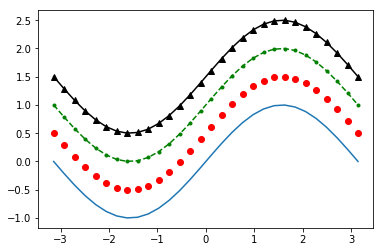

In [12]:
plt.errorbar(xs, ys)                  # Default setting of fmt, or fmt="-"
plt.errorbar(xs, ys+0.5, fmt="ro")    # Red circles, no line (a little higher than first line)
plt.errorbar(xs, ys+1.0, fmt="g.--")  # Green points and dashed line
plt.errorbar(xs, ys+1.5, fmt="k^-")   # Black triangles, solid line
plt.show()

## <span id="colors">Choosing Colors</span>
***
Rather than setting the color in the `fmt` string, any plotting command has an additional parameter: `color=...`. <br>
For example, you could use `plt.plot(x, y, fmt="o-", color=...)` <br>
[This is a much more detailed guide on specifying colors](https://matplotlib.org/users/colors.html)

### Basic colors
In the `fmt` string above, the color is set using the most basic way: using a **one-letter shortcut** for the color name. Colors available this way are:

<img src="../images/plotting-colors-simple.png">

**This is the only way to set a color in the `fmt` string. If you want to set a different color, use `color=...` parameter.**

### Default MatPlotLib Colors

If you don't set a color in the `fmt` or `color` parameter, MatPlotLib will choose one of the **default** colors, and cycle through them. So, the first line will have `color=C0`, the second line will have `color=C1` and so on. 

You can change `color` to whatever value you want on your own, and you can choose one of the default colors from these:

<img src="../images/plotting-colors-default.png">

### Named Colors

Another way to set `color` is by using the color's **name**. If you know of a particular color, chances are, you can use its name in MatPlotLib. (teal, tomato, fuchsia, what have you). The list of names colors is available [here](https://matplotlib.org/users/colors.html).

### Hexadecimal Colors

If you ever feel limited by all of those available colors, feel free to try **hex colors**! :) Using a hexadecimal representation allows you to choose from 16,000,000 possible shades :)

A **hexadecimal number** is a number in a hexadecimal (base 16) as opposed to a decimal (base 10) system.
* Decimal digits are: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
* Hexadecimal digits are: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, A, B, C, D, E, F

A color is represented using `#RRGGBB`. 

* `#` means "this is a hex color code"
* `RR` is the amount of red, going from `00` (no red) to `FF` (maximum amount)
* `GG` is the amount of green
* `BB` is the amount of blue

You don't need to understand how hexadecimal colors work: there are [lots of tools available](https://www.google.com/search?q=hex+color+picker&oq=hex+color+&aqs=chrome.0.0l2j69i60j69i57j69i60j0.1628j0j9&sourceid=chrome&ie=UTF-8) for this!

***

Here is an example of choosing colors in different ways.

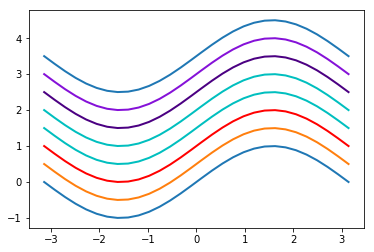

In [27]:
plt.errorbar(xs, ys, lw=2)                      # Default color (C0)
plt.errorbar(xs, ys+0.5, lw=2)                  # Default color (C1 since this is the second line)
plt.errorbar(xs, ys+1.0, lw=2, color="#ff0000") # Red, equivalent to "r"
plt.errorbar(xs, ys+1.5, lw=2, fmt="-c")        # Yellow
plt.errorbar(xs, ys+2.0, lw=2, color="c")       # Yellow, but using the color keyword
plt.errorbar(xs, ys+2.5, lw=2, color="indigo")  # Indigo
plt.errorbar(xs, ys+3.0, lw=2, color="#8511d8") # A nice purple from the color picker
plt.errorbar(xs, ys+3.5, lw=2, color="C0")      # C0 again, but by default MPL would make this line C2, since C0 already exists
plt.show()

## <span id="fontsize">Changing Font Size</font>
***

The easiest way to change the font size is by using

    plt.rcParams.update({'font.size': some number})
    
**This changes the default font size in the entire document and it's better to do this in the same cell as where you import MatPlotLib**.

If you really want to change the font size for individual plots/elements, you can do so: every *text* element of the plot has a `fontsize` property that you can set.
* `title(`" your title ... ", `fontsize=16)` sets ths title size to 16
* `xlabel(`"label...", `fontsize=12)` sets the x label font size to 12
* `yticks(fontsize=14)` sets the font size of the numberes on the y-axes to 14


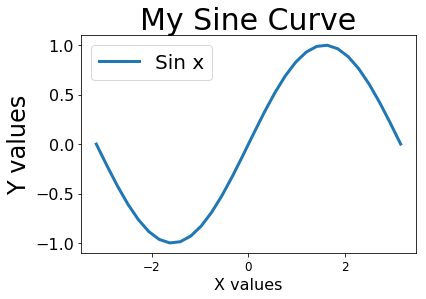

In [40]:
# Change the default font size for all plots to 16
plt.rcParams.update({'font.size': 16})

# Plot the data
plt.errorbar(xs, ys, lw=3, label="Sin x")
plt.xlabel("X values")
plt.ylabel("Y values", fontsize=24)
plt.title("My Sine Curve", fontsize=30)
plt.legend(fontsize=20)

# Change font sizes of numbers on x axis
plt.xticks(fontsize=12)

plt.show()

## <span id="figsize">Changing Figure size</span>
***
By default, a new **figure** is created when you try to plot something in a new cell. You can also create a figure without plotting anything, and set some parameters of the figure like `figsize`.

`plt.figure`(`figsize`=(x, y) ) creates an empty figure with a given size, although it won't display until you plot something.

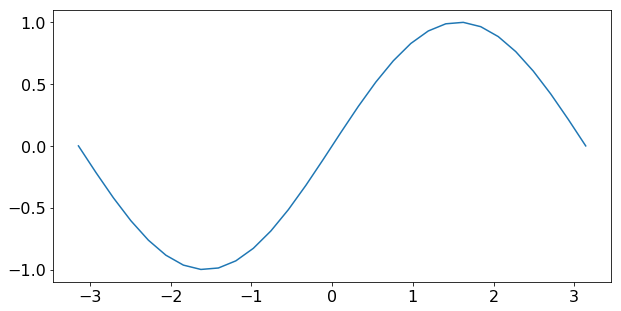

In [45]:
plt.figure( figsize=(10, 5) )
plt.plot(xs, ys)
plt.show()

## <span id="other-stuff">Customizing Even More</span>
***

<img src="../images/under_construction.png">